In [1]:
import numpy as np
import pandas as pd
from pylab import *
import bioframe
from scipy.stats import zscore
from scipy import stats
nanzscore = lambda x: (x - np.nanmean(x))/np.nanstd(x)

In [2]:
%matplotlib 
#%qtconsole

Using matplotlib backend: Qt5Agg


In [3]:
d16p_rstr = 'chr7:133,832,982-134,376,644'
ld16p_rstr = 'chr7:0-133,832,982'
#ld16p_rstr = 'chr7:133,332,982-133,832,982'

rd16p_rstr = 'chr7:134,376,644-152,876,644'
#rd16p_rstr = 'chr7:134,376,644-134,876,644'
pcdha_rstr = 'chr18:37,089,939-37,347,314'
pcdhb_rstr = 'chr18:37,424,652-37,681,073'
pcdhc_rstr = 'chr18:37,821,599-38,001,526'
vp_dict = {
    'pcdha': pcdha_rstr, 
    'pcdhb': pcdhb_rstr,
    'pcdhc': pcdhc_rstr,
    'd16p': d16p_rstr,
    'l500kb_d16p': ld16p_rstr,
    'r500kb_d16p': rd16p_rstr,
    'chr18_SE1': 'chr18:33,620,000-33,670,000',
    'chr18_SE2': 'chr18:35,950,000-36,100,000',
    'chr18_SE3': 'chr18:37,950,000-38,050,000',
    'chr18_SE4': 'chr18:38,530,000-38,560,000',
    'chr18_SE5': 'chr18:43,520,000-43,575,000',
    'chr18_ABchg': 'chr18:39,000,000-39,700,000',
    'pcdhc_enhancer': 'chr18:38008577-38040438'
}

In [4]:
df = {}
chr18 = {}
chr7 = {}
for k in ['npc-c', 'npc-d', 'npc-dd']:
    df[k] = pd.read_csv('../data/{}-cis-trans-sum.bedgraph'.format(k.upper()), delim_whitespace=True)
    chr18[k] = bioframe.slice_bedframe(df[k], 'chr18:0-100M')
    chr7[k] = bioframe.slice_bedframe(df[k], 'chr7:0-150M')
    # calculate cis/trans ratio
    chr7[k].loc[:, 'cis_trans'] = chr7[k].cis.values/chr7[k].trans.values
    chr18[k].loc[:, 'cis_trans'] = chr18[k].cis.values/chr18[k].trans.values
    chr7[k]['z_cis_trans'] = nanzscore(chr7[k].cis_trans.values)
    chr18[k]['z_cis_trans'] = nanzscore(chr18[k].cis_trans.values)
    # calculate nan-zscore

/home/ehsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/ehsan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/ehsan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ehsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10:

In [5]:
cols = ['chrom', 'start', 'end', 'score']
ab_df = {}
for k in ['npc-c', 'npc-d', 'npc-dd']:
    for chrom in ['chr7', 'chr18']:
        ab_df = pd.read_csv('../data/compartments-res250kb/{k}-res250kb-{chrom}-AB.bed'.format(k=k.upper(), chrom=chrom),  delim_whitespace=True)

In [62]:
## save bedgraph files: cis/trans zscore zscore rank
columns = ['chrom', 'start', 'end', 'cis_trans', 'z_cis_trans', 'zpercentile']
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    df = pd.DataFrame()
    df[columns[:-1]] = chr7[k][columns[:-1]]
    zpercent = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(chr7[k].z_cis_trans.values)])
    df[columns[-1]] = zpercent
    #
    df2 = pd.DataFrame()
    df2[columns[:-1]] = chr18[k][columns[:-1]]
    zpercent = np.array([stats.percentileofscore(chr18[k].z_cis_trans.values, v) for i,v in enumerate(chr18[k].z_cis_trans.values)])
    df2[columns[-1]] = zpercent
    res_df = pd.concat([df, df2],ignore_index=True)
    res_df.to_csv('../data/{celltype}-chr7-chr18-cis-trans-zscore.bedgraph'.format(celltype=k.upper()), sep='\t', index=False, na_rep='nan')



In [8]:
save = False
#save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_l16p = bioframe.slice_bedframe(chr7[k], ld16p_rstr)
    df_r16p = bioframe.slice_bedframe(chr7[k], rd16p_rstr)
    df_d16p = bioframe.slice_bedframe(chr7[k], d16p_rstr)
    lp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_l16p.z_cis_trans.values)])
    dp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_d16p.z_cis_trans.values)])
    rp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_r16p.z_cis_trans.values)])
    ax1.plot(df_l16p.start, lp, '--*', color='C%d'%i, label='{}'.format(k.upper()))
    ax1.plot(df_d16p.start, dp, '-x', color='C%d'%i)
    ax1.plot(df_r16p.start, rp, '--+', color='C%d'%i)    
    ax2.plot(df_l16p.start, df_l16p.z_cis_trans, '--*', color='C%d'%i, label='{}'.format(k.upper()))
    ax2.plot(df_d16p.start, df_d16p.z_cis_trans, '-x', color='C%d'%i)
    ax2.plot(df_r16p.start, df_r16p.z_cis_trans, '--+', color='C%d'%i)
ax1.set_ylabel('Percentile rank')
ax2.set_ylabel('z-score')
ax1.set_title('NPC, chr7:16p, cis/trans')

for ax in f.axes:
    ax.set_xlabel('Coordinates')
    ax.legend(loc='best')
    ax.axvspan(df_d16p.start.values[0], df_d16p.end.values[-1], facecolor='black', alpha=0.2)
    ax.set_xlim(0,152*1e6)

tight_layout()
if save:
    fname = 'NPC-16p-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [ ]:
save = False
save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_l16p = bioframe.slice_bedframe(chr7[k], ld16p_rstr)
    df_r16p = bioframe.slice_bedframe(chr7[k], rd16p_rstr)
    df_d16p = bioframe.slice_bedframe(chr7[k], d16p_rstr)
    lp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_l16p.z_cis_trans.values)])
    dp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_d16p.z_cis_trans.values)])
    rp = np.array([stats.percentileofscore(chr7[k].z_cis_trans.values, v) for i,v in enumerate(df_r16p.z_cis_trans.values)])
    if i==0:
        lp0 = lp
        dp0 = dp
        rp0 = rp
        lpz0 = df_l16p.z_cis_trans.values
        dpz0 = df_d16p.z_cis_trans.values
        rpz0 = df_r16p.z_cis_trans.values
        continue;
    ax1.bar(df_l16p.start, height=lp-lp0, width=5e4, alpha=0.8, align='edge', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))
    ax1.bar(df_d16p.start, height=dp-dp0, width=5e4, alpha=0.8, align='edge', color='C%d'%i)
    ax1.bar(df_r16p.start, height=rp-rp0, width=5e4, alpha=0.8, align='edge', color='C%d'%i)    
    ax2.plot(df_l16p.start, df_l16p.z_cis_trans-lpz0, '--*', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))
    ax2.plot(df_d16p.start, df_d16p.z_cis_trans-dpz0, '-x', color='C%d'%i)
    ax2.plot(df_r16p.start, df_r16p.z_cis_trans-rpz0, '--+', color='C%d'%i)
ax1.set_ylabel('Diff. percentile rank:\n mutant - control')
ax2.set_ylabel('Diff. z-score:\n mutant - control')
ax1.set_title('NPC, chr7:16p, diff. cis/trans')
for ax in f.axes:
    ax.set_xlabel('Coordinates')
    ax.legend(loc='best')
    ax.axvspan(df_d16p.start.values[0], df_d16p.end.values[-1], facecolor='black', alpha=0.2)
    ax.set_xlim(0,152*1e8)
tight_layout()
if save:
    fname = 'NPC-16p-diff-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [17]:
save = False
save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_pcdh = bioframe.slice_bedframe(chr18[k], 'chr18:36.9M-38.20M')
    df_pcdha = bioframe.slice_bedframe(chr18[k], pcdha_rstr)
    df_pcdhb = bioframe.slice_bedframe(chr18[k], pcdhb_rstr)
    df_pcdhc = bioframe.slice_bedframe(chr18[k], pcdhc_rstr)
    pcdh = np.array([stats.percentileofscore(chr18[k].z_cis_trans.values, v) for i,v in enumerate(df_pcdh.z_cis_trans.values)])
    if i==0:
        pcdh0 = pcdh
        pcdhz0 = df_pcdh.z_cis_trans.values
        continue;
    ax1.bar(df_pcdh.start, height=pcdh-pcdh0, width=5e4, alpha=0.8, align='edge', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))
    ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans-pcdhz0, '--*', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))

    #ax1.plot(df_pcdh.start, pcdh, '-x', color='C%d'%i, label='{}'.format(k.upper()))
    #ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans, '-x', color='C%d'%i, label='{}'.format(k.upper()))
ax1.set_ylabel('Percentile rank')
ax2.set_ylabel('z-score')
ax1.set_title('NPC, chr18:PCDH, cis/trans')

for ax in f.axes:
    ax.set_xlabel('Coordinates')
    ax.legend(loc='upper left')
    ax.axvspan(df_pcdha.start.values[0], df_pcdha.end.values[-1], facecolor='black', alpha=0.2)
    ax.axvspan(df_pcdhb.start.values[0], df_pcdhb.end.values[-1], facecolor='C4', alpha=0.2)
    ax.axvspan(df_pcdhc.start.values[0], df_pcdhc.end.values[-1], facecolor='C5', alpha=0.2)
    
tight_layout()
if save:
    fname = 'NPC-pcdh-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

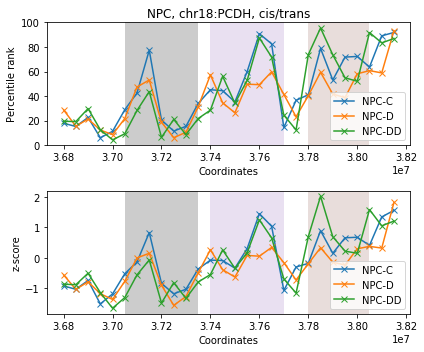

In [18]:
save = False
save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_pcdh = bioframe.slice_bedframe(chr18[k], 'chr18:36.8M-38.2M')
    df_pcdha = bioframe.slice_bedframe(chr18[k], pcdha_rstr)
    df_pcdhb = bioframe.slice_bedframe(chr18[k], pcdhb_rstr)
    df_pcdhc = bioframe.slice_bedframe(chr18[k], pcdhc_rstr)
    pcdh = np.array([stats.percentileofscore(chr18[k].z_cis_trans.values, v) for i,v in enumerate(df_pcdh.z_cis_trans.values)])
    
    ax1.plot(df_pcdh.start, pcdh, '-x', color='C%d'%i, label='{}'.format(k.upper()))
    ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans, '-x', color='C%d'%i, label='{}'.format(k.upper()))
ax1.set_ylabel('Percentile rank')
ax2.set_ylabel('z-score')
ax1.set_title('NPC, chr18:PCDH, cis/trans')

for ax in f.axes:
    ax.set_xlabel('Coordinates')
    ax.legend(loc='lower right')
    ax.axvspan(df_pcdha.start.values[0], df_pcdha.end.values[-1], facecolor='black', alpha=0.2)
    ax.axvspan(df_pcdhb.start.values[0], df_pcdhb.end.values[-1], facecolor='C4', alpha=0.2)
    ax.axvspan(df_pcdhc.start.values[0], df_pcdhc.end.values[-1], facecolor='C5', alpha=0.2)
    
tight_layout()
if save:
    fname = 'NPC-pcdh-diff-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [12]:
#chr7['npc-c'].loc[:, ['cis', 'trans', 'trans-chr7', 'trans-chr18']]

In [20]:
save = False
save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_pcdh = bioframe.slice_bedframe(chr18[k], 'chr18:34M-37M')
    df_pcdha = bioframe.slice_bedframe(chr18[k], pcdha_rstr)
    df_pcdhb = bioframe.slice_bedframe(chr18[k], pcdhb_rstr)
    df_pcdhc = bioframe.slice_bedframe(chr18[k], pcdhc_rstr)
    pcdh = np.array([stats.percentileofscore(chr18[k].z_cis_trans.values, v) for i,v in enumerate(df_pcdh.z_cis_trans.values)])
    
    ax1.plot(df_pcdh.start, pcdh, '-x', color='C%d'%i, label='{}'.format(k.upper()))
    ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans, '-x', color='C%d'%i, label='{}'.format(k.upper()))
ax1.set_ylabel('Percentile rank')
ax2.set_ylabel('z-score')
ax1.set_title('NPC, chr18:PCDH, cis/trans')
ax1.legend(loc='upper right')

for ax in f.axes:
    ax.set_xlabel('Coordinates')
    
    #ax.axvspan(df_pcdha.start.values[0], df_pcdha.end.values[-1], facecolor='black', alpha=0.2)
    #ax.axvspan(df_pcdhb.start.values[0], df_pcdhb.end.values[-1], facecolor='C4', alpha=0.2)
    #ax.axvspan(df_pcdhc.start.values[0], df_pcdhc.end.values[-1], facecolor='C5', alpha=0.2)
    
tight_layout()
if save:
    fname = 'NPC-chr18-Acomp-34M-37M-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

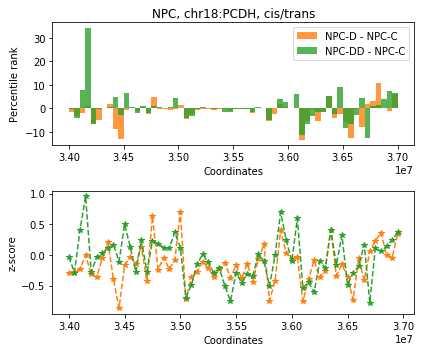

In [21]:
save = False
save = True

f = figure(figsize=(6,5))
ax1 = subplot(211)
ax2 = subplot(212)
for i, k in enumerate(['npc-c', 'npc-d', 'npc-dd']):
    #ax1.plot(chr18[k].start, chr18[k].z_cis_trans)
    df_pcdh = bioframe.slice_bedframe(chr18[k], 'chr18:34M-37M')
    df_pcdha = bioframe.slice_bedframe(chr18[k], pcdha_rstr)
    df_pcdhb = bioframe.slice_bedframe(chr18[k], pcdhb_rstr)
    df_pcdhc = bioframe.slice_bedframe(chr18[k], pcdhc_rstr)
    pcdh = np.array([stats.percentileofscore(chr18[k].z_cis_trans.values, v) for i,v in enumerate(df_pcdh.z_cis_trans.values)])
    if i==0:
        pcdh0 = pcdh
        pcdhz0 = df_pcdh.z_cis_trans.values
        continue;
    ax1.bar(df_pcdh.start, height=pcdh-pcdh0, width=5e4, alpha=0.8, align='edge', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))
    ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans-pcdhz0, '--*', color='C%d'%i, label='{} - NPC-C'.format(k.upper()))

    #ax1.plot(df_pcdh.start, pcdh, '-x', color='C%d'%i, label='{}'.format(k.upper()))
    #ax2.plot(df_pcdh.start, df_pcdh.z_cis_trans, '-x', color='C%d'%i, label='{}'.format(k.upper()))
ax1.set_ylabel('Percentile rank')
ax2.set_ylabel('z-score')
ax1.set_title('NPC, chr18:PCDH, cis/trans')
ax1.legend(loc='upper right')

for ax in f.axes:
    ax.set_xlabel('Coordinates')
    #ax.axvspan(df_pcdha.start.values[0], df_pcdha.end.values[-1], facecolor='black', alpha=0.2)
    #ax.axvspan(df_pcdhb.start.values[0], df_pcdhb.end.values[-1], facecolor='C4', alpha=0.2)
    #ax.axvspan(df_pcdhc.start.values[0], df_pcdhc.end.values[-1], facecolor='C5', alpha=0.2)
    
tight_layout()
if save:
    fname = 'NPC-chr18-Acomp-34M-37M-diff-cis-trans-scores'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [6]:
%qtconsole

In [13]:
chr7['npc-c']['cis_trans'] = chr7['npc-c'].cis/chr7['npc-c'].trans

/home/ehsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
f = figure()
plot(ab_df.start, nanzscore(ab_df.score0.values))
plot(chr7['npc-c'].start, nanzscore(chr7['npc-c'].cis_trans.values))